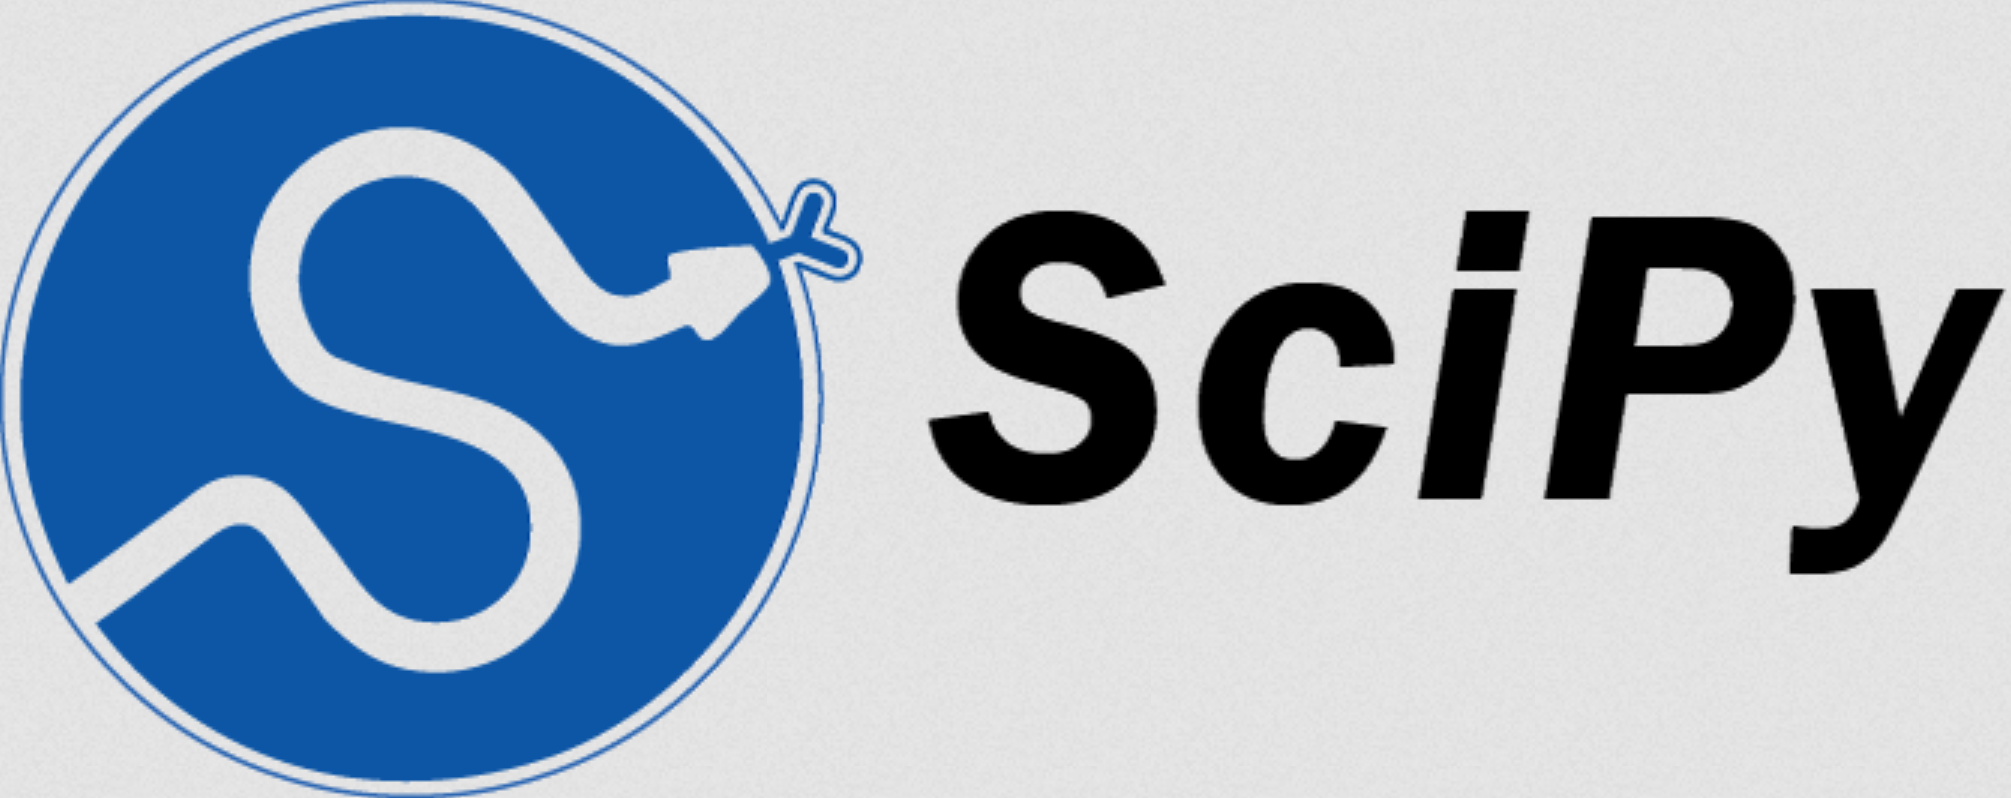
# Scipy.Stats Overview
***
## What is SciPy?

[SciPy](https://docs.scipy.org/doc/scipy/index.html) is a python library which is built upon the NumPy library and is intended to be similar in functionality to a analytical and data-processing tool like MATLAB.

Stats is the statistical set of functions for the Scipy library and will be the focus of this notebook. This package contains functionality for probability distributions (normal, binomial), statistical tests(t-test, ANOVA) and much more functionality which I would do a disservice to mention here but for an exhaustive list [visit this page](https://docs.scipy.org/doc/scipy/reference/stats.html) for the scipy.stats documentation.

Due to SciPy being an extension of NumPy, it's easy to assume that they fulfill much the same role, but how NumPy and SciPy approach for example distributions of random numbers is different in a fundamental way, SciPy's approach is to more directly expose the underlying statistics, NumPy instead gives the output more directly. 
To illustrate this I'll compare the means of a normal distribution produced by NumPy and one by SciPy, what is notable is that SciPy will always give the exact mean that statistically you should see after repeating the normal distribution from NumPy many times. This is down to how SciPy is representing these distributions as random variables, whereas NumPy is generating a random set of numbers based on the statistical rules. Now technically speaking SciPy isn't generating a set of values in the below example (it can do-so using it's rvs function) but this is just to help illustrate how it works.

In [1]:
#import stats module from scipy package
from scipy import stats
import numpy as np

stats_test = stats.norm(loc=0.0, scale=1.0) #create normal random variable
np_test = np.random.normal(loc=0.0, scale=1.0, size=100) #generate 100 random numbers according to normal distribution

print(f'''SciPy gives a mean of {stats_test.mean()}
NumPy gives a mean of {np_test.mean()}
If we repeated NumPy many times and got the mean of the means or used a much larger size value, we would gradually get closer to 0.
As 0 is the loc and statistically speaking is what the mean should be, hence that is what SciPy returns.''')

SciPy gives a mean of 0.0
NumPy gives a mean of 0.1415854361935317
If we repeated NumPy many times and got the mean of the means or used a much larger size value, we would gradually get closer to 0.
As 0 is the loc and statistically speaking is what the mean should be, hence that is what SciPy returns.


***
## Summary of SciPy's statistical functions
A detailed list of SciPy's statistical functions can be seen here: https://docs.scipy.org/doc/scipy/reference/stats.html

But to summarise the main areas of interest which scipy.stats provides classes for are:
* <b>Probability distributions</b> - Different classes and functions for creating random variables and generating distributions (as done on previous cell with normal distribution).
* <b>Summary Statistics</b> - Classes that take in arrays and return summary statistics about it, such as iqr() for the interquartile range, variation to get the coefficient of variance, describe which generates a set of typical statistics (similar to pandas describe function).
* <b>Frequency Statistics</b> -  Classes to determine the frequency of occurence of data points in your arrays, cumfreq() for example returns a cummulative frequency histogram which shows the cummulative occurence of values up to a specified bin, binned_statistic() which allows you to split your data up into different bins depending on input parameters defined like the number of bins and it determines the value of statistic specified within the bins e.g. mean.
* <b>Correlation Functions</b> - Classes to determine the statistical correlation between random variables e.g. is the correlation between random variables statistically significant. This is also what this notebook is focused on, though specifically for f_oneway() which performs a one-way ANOVA test.
* <b>Statistical Tests</b> - Classes for performing different statistical tests on passed in arrays, such as levene() (which is used in testing requisite below in testing requisite assumptions for ANOVA) which tests for variance of homogeneity to determine do the passed in arrays have equal variance. Similarly a dataset could be tested for whether it follows a certain distribution such as whether it is normally distributed.
* <b>Masked statistics functions</b> - Classes which have same functionality as majority of the rest of scipy.stats (not including probability distributions listed above) but is specifically for handling masked data e.g. data with missing values.

There are lots of other areas that scipy.stats deals with but to describe them all would be exhaustive and long winded.


## Random Variables

Random Variables encapsulate a lot of the functionality for the Probability distributions mentioned briefly above, and can be categorized into continuous and discrete random variables.
For example stats.norm and stats.binom both return random variables.

Typically the Random Variables contain the follow functionality:
* rvs - random variates, used to generate numbers
* pdf - probability density function
* cdf - cummulative distribution function
* stats - mean, variance, skew, kurtosis
* median - median
* var - variance
* std - standard deviation



In [2]:
#reusing random variable declared previously to demonstrate this
print(f"rvs (takes in value for number of random number to generate) - {stats_test.rvs(1)}\npdf (generate probability density for provided value/array) - {stats_test.pdf(1)}\ncdf (gives cummulative probability up to value, integral of the pdf) - {stats_test.cdf(1)}\nstats - {stats_test.stats()}\nmean - {stats_test.mean()}\nvar - {stats_test.var()}\nstd - {stats_test.std()}")

rvs (takes in value for number of random number to generate) - [-0.69529336]
pdf (generate probability density for provided value/array) - 0.24197072451914337
cdf (gives cummulative probability up to value, integral of the pdf) - 0.8413447460685429
stats - (array(0.), array(1.))
mean - 0.0
var - 1.0
std - 1.0


## Quick visualistation of the above pdf and cdf
Inspired by https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm visualisation of pdf for normal distribution.



Text(0.5, 1.0, 'Plotting pdf and cdf')

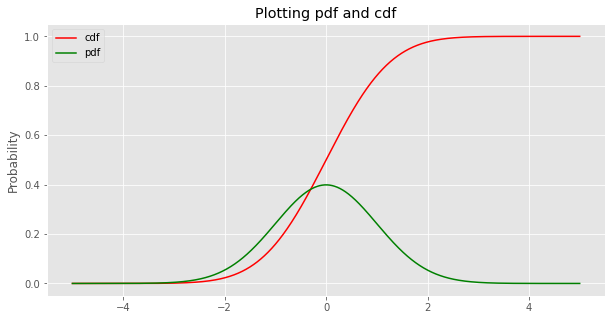

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot') #use this style for rest of notebook

#input array goes from -5 to 5 in 2000 steps
in_array = np.linspace(-5,5,2000)
cdf_array = stats_test.cdf(in_array) #cdf of input array
pdf_array = stats_test.pdf(in_array) #pdf of input array

plt.figure(figsize=(10,5))

#plot data
sns.lineplot(x=in_array,y=cdf_array, label='cdf', color='red')
sns.lineplot(x=in_array,y=pdf_array, label='pdf', color='green')
plt.ylabel("Probability")
plt.title('Plotting pdf and cdf')


## Summary Statistics Examples
To illustrate some of the Summary Statistcs functionality in scipy stats mentioned earlier, I'll demonstrate some of these using the simple normal random variable that's already defined. 
But first some data is needed to summarise, and so will need to generate an array of values from our random variable.

In [4]:
from pprint import pprint

#generate 1000000 values from stats_test random variable
stats_test_array = stats_test.rvs(1000000)

print(f"From the randomly generate array we see a inter quartile range of: {stats.iqr(stats_test_array)}")
print(f"From the randomly generate array we see coefficient of variance of: {stats.variation(stats_test_array)}")
#print(f"Most commonly occuring value: {stats.mode(stats_test_array)}") #Was going to print the mode but chances are won't see same value twice, so no point
print("\nSummary information from describe function:")
pprint(stats.describe(stats_test_array))

From the randomly generate array we see a inter quartile range of: 1.3505905583345816
From the randomly generate array we see coefficient of variance of: 1619.3305129422627

Summary information from describe function:
DescribeResult(nobs=1000000, minmax=(-5.204019752101151, 4.781093839264187), mean=0.0006176082590948152, variance=1.0002248107409661, skewness=-0.005254050574143176, kurtosis=-0.002381435375465202)


From the describe output, we see some interesting confirmation that was aluded to in the initial comparison between numpy and scipy, as we are now generating random data the mean is no longer 0 exactly and the variance is no longer 1. However they are very close, and if a largely set of numbers was produced with rvs(), we would see these get even closer to their respective valeus for the random variable.
***
## Frequency Statistics Example

Next to illustrate some of the frequency statistic functionality, the binned_statistic() function will be tried out, this will return a target statistic across each bin in the dataset whihc in this  case will be specified as the mean. This will then be visualised to show defining a histogram using what is returned by binned_statistic, so that matplob hist function is not deciding bin size for us.

In [5]:
#get mean value across 10 bins
stats_test_array_binned_stats= stats.binned_statistic(x=stats_test_array,values=stats_test_array, statistic='mean', bins=10)
print(f"Mean value across each bin: {stats_test_array_binned_stats.statistic}")
print(f"Bin edges: {stats_test_array_binned_stats.bin_edges}")

Mean value across each bin: [-4.50726809 -3.45534823 -2.51528223 -1.5779366  -0.65352189  0.26573413
  1.18506857  2.11492586  3.05990104  4.02529178]
Bin edges: [-5.20401975 -4.20550839 -3.20699703 -2.20848567 -1.20997432 -0.21146296
  0.7870484   1.78555976  2.78407112  3.78258248  4.78109384]


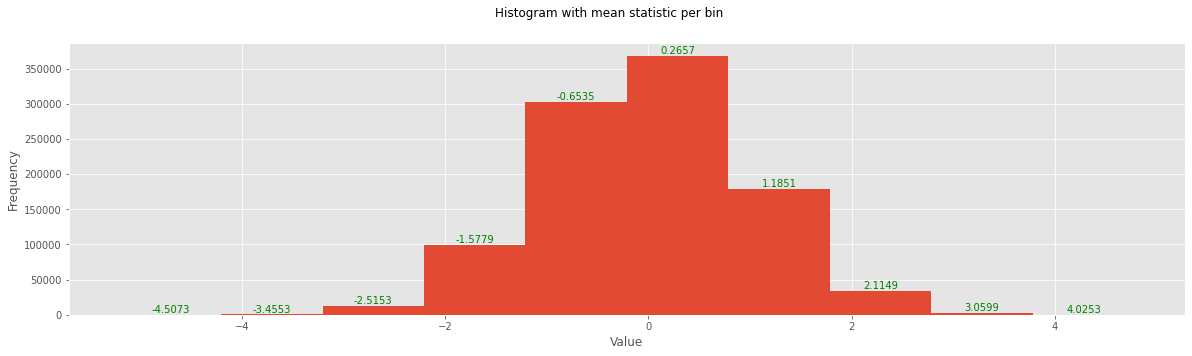

In [6]:
#inspired by this article on adding labels to histogram plots: https://www.geeksforgeeks.org/adding-labels-to-histogram-bars-in-matplotlib/
fig, ax = plt.subplots(1,1, figsize=(20,5))
fig.suptitle('Histogram with mean statistic per bin')
#use bin_edges from what binned_statistic() returns
plt.hist(stats_test_array, bins=stats_test_array_binned_stats.bin_edges)

ax.set_ylabel('Frequency')
ax.set_xlabel('Value')

#get rectangles used in hist, and create list of labels to be applied to these
rects = ax.patches
labels = [f"{round(stats_test_array_binned_stats.statistic[i],4)}" for i in range(len(rects))]

#zip together the rects and labels to iterate over
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #uing rect positioning, add the label
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
            ha='center', va='bottom', color = 'green')

***
## Statistical Test Example
To demonstrate a statistical test, will test the already created dataset stats_test_arary for it's normality using normaltest(), which will return a statistic for the z-score from a kurtosis test and a p-value which will interpret to determine whether or not the null hypothesis gets rejected.
The null hypothesis being that the input comes from a normal distribution.

In [7]:
#test earlier generated array for normality
normal_test = stats.normaltest(stats_test_array)
print(f"Performing normal test we see a p-value of: {normal_test.pvalue}")
#put in a simple test whether below or at threshold value of 5%
if(normal_test.pvalue <= 0.05):
    print("Null hypothesis rejected, input array is not normally distributed")
else:
    print("Null hypothesis not rejected")

Performing normal test we see a p-value of: 0.08918191033437238
Null hypothesis not rejected


After repeating a few times the p-value is in general worse than expected (seen as low as 0.09), though it is still always  above the typical threshold alpha value of 0.05 (5%), therefore the null hypothesis can be rejected, however this shows the importance of the alpha value that was picked as in a few cases if alpha of 10% was specified the null hypothesis would have been incorrectly rejected.

Though it's worth noting that just because we are not rejecting the idea that the input is normally distributed, does not mean it is by default therefore normally distributed, simply, it is that we have ran a test to determine whether or not we can reject the idea that the input array is normally distributed and what the test is telling us is that based on the input it can't say that it is not normally distributed - but that is not the same as it saying it is normally distributed.

***
## Correlation Functions and Masked Statistics Functions
Correlation functions are the focus of the next section and will be demonstrated there, by virtue of performing ANOVA analysis.

Masked Statistics functions would be removing data points and re repreating same steps as earlier so doesn' seem to be relevant to include as is really retrodding same ground as above.

# Hypothesis testing with ANOVA
[Wikipedia reference article used for this section](https://en.wikipedia.org/wiki/Analysis_of_variance)

## What is ANOVA?

ANOVA stands for Analysis of Variance, it is a set of statistical tests for analysing the variation of different groups means. It allows you to determine whether or not the difference between population means are statistically significant.

ANOVA gives an F value which can be interpreted to give a p-value, in general if the p-value is less than 0.05 then we can reject the null hypothesis that there is no difference in means.

However what ANOVA doesn't tell is what groups their is statistical significance between, and so typically on ANOVA test confirming statistical significance between the groups, a further post-hoc test is performed to determeine what relationship between the groups is.

The type of ANOVA being performed in this notebook is a one way ANOVA test, as it is performed over a single idependent/categorical variable, there are other types of ANOVA like two way, however this is not part of the scipy.stats library and to do so could make use of other packages like Statsmodels [anova_lm](https://www.statsmodels.org/dev/generated/statsmodels.stats.anova.anova_lm.html), but this foalls outside of the scope for this project.

What ANOVA is allowing us to do with the dataset that is imported below (the load_wine dataset from sklearn) is to determine are there really differences in alcohol between the different classes (class 0 vs. class 1 vs. class 2), or is it just by chance that they have different means and values. We determine this by evaluating over each group whether there is a statistical significance in them being different based on their means, if so, then we can make the claim with some confidence that there is a difference in alcohol across each of the classes, or at least we can rule out that their means are not equal.

## Alternative and Null hypothesis
[Wikipedia article on hypothesis testing](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing)

The p-value we are looking for in this case is whether it is below a threshold value 0.05 (5%), if the p-value is below then we can reject the null hypothesis and can acknowledge that the data favours the alternative hypothesis. The alternative hypothesis is always the oposite of the null hypothesis, so rejecting the null hypothesis is the same thing as accepting the alternative hyptohesis, however to keep simple below, will simply refer to either accepting or rejecting the null hypothesis.

From looking at the description of the null hypothesis in [scipy.stats documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html), it is that "two or more groups have the same population mean". So if the p-value is less than or equal to 0.05 in the below example, then we reject the idea that means are the same across groups and therefore that the groups are different (e.g. in the wine dataset that there is different alcohol contents in different classes of wine). If the p-value is greater than 0.05 then we don't reject the null hypothesis, however that doesn't mean encesarily that the null hypothesis is true, just that based on the current available data we can't disprove the null hypothesis.

## Prerequisite Assumptions
Before performing ANOVA, you should first check the following 6 assumptions are true, if any of your assumptions are not correct this casts doubt on whether ANOVA is a suitable test for your data.
***
1) Your dependent variable should be a continuous variable.
2) Your independent variable should be a categorical variable and it should be made up of 2 or more groups (though if it's just 2 groups t-test is probably more appropriate)
3) Observations should be independent, that is to say, if asking people for their favourite movie you wouldn't ask the same person twice.
4) There should be no significant outliers.
5) The dependent variable should be normally distributed across it's independent variable groups.
6) The variance should be homogenous across each independent variable group.
***

For these assumptions, the first 3 can all be determined without doing any statistical tests, points 1 and 2 should be clear from looking at the data. As for point 3 on the observatiovs being independent, this is something you can't really confirm for yourself and when using data available online (suchas used in this notebook), but this is something you can control when collecting the data yourself.

The rest of the assumptions can each be determined statistically.

For determining outliers we can make use of box plot's to see if we have any points that fall outside of 
$ Q1 - IQR*1.5 $ and $ Q3 - IQR*1.5 $.
As another way of spotting outliers we can also use a z-score outside of the range of -3 to +3 to identify outliers.

Whether the dependent variable is normally distributed across its categories can be found using the Shapiro-Wilks test of normality.

Variance Homogeneity can be determined using Levene's test.
***

Before actually performing the ANOVA test below, will first check that each of the assumptions outlined above are not violated

In [8]:
#Todo add code for testing assumptions on some test dataset
from sklearn import datasets

wine_ds = datasets.load_wine(as_frame=True) #get the wine dataset, bring in with dataframe also
wine_dependent_df = wine_ds.data #get dataframe from wine_ds
wine_independent_df = wine_ds.target
dependent_variable = 'alcohol'

## Assumptions 1 & 2

Dependent variable e.g.'alcohol' is continuous variable, will test this by using pandas describe function to show the count of values and other summary information.
Independent variable is categorical variable, as it's a dataset from sklearn can use the target_names attribute of the dataset, to see the different categories.

In [9]:
#Assumption 1 and Assumption 2

print(f"For this ANOVA test I'd like to pick '{dependent_variable}' to be the independent variable, a quick check of this column using pandas describe() function confirms assumption 1")
print(f"\n{wine_dependent_df[dependent_variable].describe()}")

print(f"\nThe following are our dependent variables groups/categories (these are represented as 0, 1 and 2 in wine_dependent_df) - {wine_ds.target_names}")
print("This confirms assumption 2 as we have a categorical variable with 3 groups")

For this ANOVA test I'd like to pick 'alcohol' to be the independent variable, a quick check of this column using pandas describe() function confirms assumption 1

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: alcohol, dtype: float64

The following are our dependent variables groups/categories (these are represented as 0, 1 and 2 in wine_dependent_df) - ['class_0' 'class_1' 'class_2']
This confirms assumption 2 as we have a categorical variable with 3 groups


Above we've confirmed the number of groups being 3, which makes it appriopriate for ANOVA as it should be done over at least 2 groups, this makes t-test not an appropriate test on this dataset as their are too many groups.

Assumption 3 is assumed to be correct in this case as there is no way of determining.
***
### Assumption 4 - No significant outliers

Assumption 4 is tested two ways, firstly with a simple bar plot to see visually if any outliers fall outside of the whiskers. Secondly it is tested using a z-score, where if the absolute returned is greater than 3 it indicates an outlier.

c:\users\itske\desktop\education\gmit modules\machine learning and statistics 52954\machine-learning-and-statistics-assessment\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Checking for independent variable outliers'}, xlabel='alcohol'>

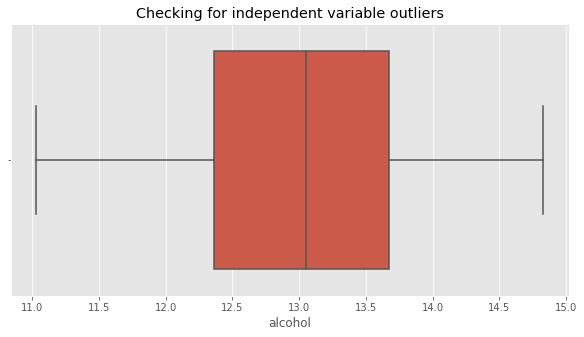

In [10]:
#Assumption 4 - No significant outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5)) #set figure size
plt.title("Checking for independent variable outliers")
sns.boxplot(wine_dependent_df[dependent_variable]) #boxplot of independent variable


Boxplot doesn't show there as being any outliers, but to play it safe let's check with z-score also. To get the z-score will make use of the scipy [zscore function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html).

In [11]:
import numpy as np
z = stats.zscore(wine_dependent_df[dependent_variable]) #get z score for each value in our independent variable
z_abs = np.abs(z) #get absolute value so we only need to check if z score is greater than 3

#Loop through z_abs, print the z-score and row it occurred on if > 3, if outliers are encountered we at least know where they occur
for row, value in enumerate(z_abs):
    if value > 3:
        print(f"Outlier detected with z-score: {value}\n Detected at row: {row}")

We've confirmed there are no significant outliers, next will check whether assumption 5 is violated.

### Assumption 5 - Dependent Variable normally distributed across categories

To determine if the dependent variable is normally distributed, scipy-stats [shapiro function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) is used, the returned p-value then tells us whether it is distributed normally.

The null hypothesis for the Shapiro-Wilks is that a variable is normally distributed, so at values < 0.05 we reject the null hypothesis.

In [12]:
#get statistic and p value for each group
class0_statistic, class0_p_val = stats.shapiro(wine_dependent_df[wine_independent_df==0][dependent_variable] )
class1_statistic, class1_p_val = stats.shapiro(wine_dependent_df[wine_independent_df==1][dependent_variable] )
class2_statistic, class2_p_val = stats.shapiro(wine_dependent_df[wine_independent_df==2][dependent_variable] )

print(f"Shapiro-Wilks P-value for classs 0 - {class0_p_val}")
print(f"Shapiro-Wilks P-value for class 1 - {class1_p_val}")
print(f"Shapiro-Wilks P-value for class 2 - {class2_p_val}")

#simple check of pvalue for whether to reject null hypothesis
if (class0_p_val <= 0.05) | (class1_p_val <= 0.05) | (class2_p_val <= 0.05):
    print("Null hypothesis rejected, groups not distributed normally")
else:
    print("Null hypothesis not rejected")

Shapiro-Wilks P-value for classs 0 - 0.47905755043029785
Shapiro-Wilks P-value for class 1 - 0.11396162211894989
Shapiro-Wilks P-value for class 2 - 0.6408376097679138
Null hypothesis not rejected


Confirming each of our assumptions so far, leaves us with the final assumption to check. 
***
#### Plotting the distributions 
[This section was inspired by Ian McLoughlin's demonstration notebook on t-test](https://nbviewer.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/main/ttest.ipynb).

Before getting into testing the final assumption, as the groups have been tested for normality and confirmed to be normal we can create random variables to represent each group by using their mean and standard deviations.
Then with those random variables can use their pdf function on a range of values to get the line's to trend the probability density functions for a plot.

Text(0.5, 1.0, 'Probability density function and histograms of wine classes')

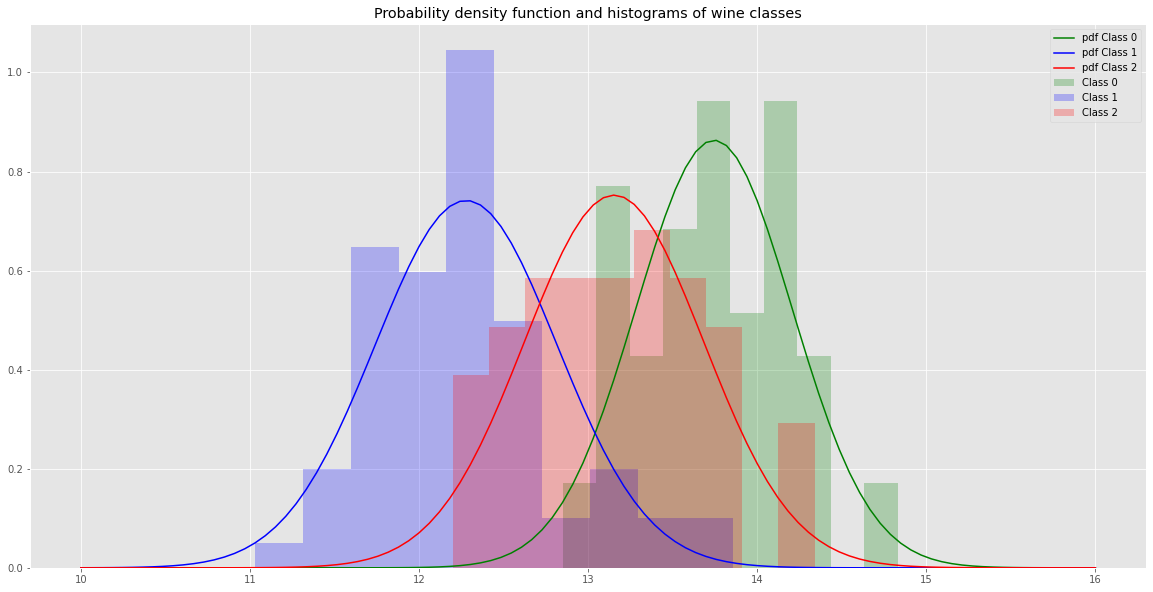

In [15]:
#inspired by Ian Mcloughlin's notebook on t-test https://nbviewer.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/main/ttest.ipynb
#differing from the inspired example, I grab the mean and standard deviation from each group in the dataset and use that to generate random variables 
# for normal distribution, the pdf of these is then used to get what will be plotted

plt.figure(figsize=(20,10))

#create random variable for normal probability distribution from group means and standard deviations
class_0_dist = stats.norm(wine_dependent_df[wine_independent_df==0][dependent_variable].mean(),wine_dependent_df[wine_independent_df==0][dependent_variable].std())
class_1_dist = stats.norm(wine_dependent_df[wine_independent_df==1][dependent_variable].mean(),wine_dependent_df[wine_independent_df==1][dependent_variable].std())
class_2_dist = stats.norm(wine_dependent_df[wine_independent_df==2][dependent_variable].mean(),wine_dependent_df[wine_independent_df==2][dependent_variable].std())

#range of values to show distribution shape
values = np.linspace(10,16,100)

#probability density function values using random variables for different groups across range of values
pdf_class_0_values = [class_0_dist.pdf(value) for value in values]
pdf_class_1_values = [class_1_dist.pdf(value) for value in values]
pdf_class_2_values = [class_2_dist.pdf(value) for value in values]


sns.lineplot(x=values,y=pdf_class_0_values, label='pdf Class 0', color='green')
sns.lineplot(x=values,y=pdf_class_1_values, label='pdf Class 1', color='blue')
sns.lineplot(x=values,y=pdf_class_2_values, label='pdf Class 2', color='red')

# Plot histograms of the different groups
plt.hist(wine_dependent_df[wine_independent_df==0][dependent_variable], density=True, color='g', alpha=0.25, label="Class 0")
plt.hist(wine_dependent_df[wine_independent_df==1][dependent_variable], density=True, color='b', alpha=0.25, label="Class 1")
plt.hist(wine_dependent_df[wine_independent_df==2][dependent_variable], density=True, color='r', alpha=0.25, label="Class 2")

# Display legend
plt.legend()
plt.title("Probability density function and histograms of wine classes")

***
### Assumption 6 - Variance Homogeneity

For determining whether the variance is homogenous e.g. that the variance is equal across groups, we use the p-value from the [levene function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) in scipy-stats.

The null hypothesis for the levene function is that the variance is equal, so if our p-value is < 0.05 we reject this hypothesis as our variance lacks homogeneity.

In [16]:
#perform levene analysis across groups
levene = stats.levene(
    wine_dependent_df[wine_independent_df==0][dependent_variable],
    wine_dependent_df[wine_independent_df==1][dependent_variable],
    wine_dependent_df[wine_independent_df==2][dependent_variable]
)

print(f"Levene returns a p-value of: {levene.pvalue}")

#simple check of pvalue for whether to reject null hypothesis
if(levene.pvalue <= 0.05):
    print("Null hypothesis rejected, not all input groups have equal variances")
else:
    print("Null hypothesis not rejected")


Levene returns a p-value of: 0.5500519055097621
Null hypothesis not rejected


We don't reject the null hypothesis that the variance lacks homogeneity, e.g. that variance is equal is not rejected.
***
## Oneway ANOVA test
Having proved every assumption true, the last step is to actually perform the oneway ANOVA test, if the returned p-value is less than 0.05, then we can reject the null hypothesis. 

The null hypothesis for ANOVA is that there is no difference between the means across the groups 

In [17]:
#perform oneway anova comparing each group
wine_anova = stats.f_oneway(
    wine_dependent_df[wine_independent_df==0][dependent_variable],
    wine_dependent_df[wine_independent_df==1][dependent_variable],
    wine_dependent_df[wine_independent_df==2][dependent_variable]
)

print(f"F-Statistic: {wine_anova.statistic}")
print(f"P-value: {wine_anova.pvalue}")

#simple check of pvalue for whether to reject null hypothesis
if(wine_anova.pvalue <= 0.05):
    print("Null hypothesis rejected, group means are not equal")
else:
    print("Null hypothesis not rejected")


F-Statistic: 135.07762424279912
P-value: 3.319503795619655e-36
Null hypothesis rejected, group means are not equal


Having met all assumptions, and performing ANOVA, we now see that the null hypothesis has been rejected, therefore we can conclude that there is a difference in the means across the groups.

### Tukey's honestly significant difference (HSD) post-hoc test
While ANOVA is telling us the difference in means across all groups are statistically significant are not, it doesn't determine which ones are or aren't siginificant.
And so to determine that a post-hoc test is performed, the post-hoc test will tell us which combinations of the groups we can reject the null hypothesis for.

In [18]:
#inspired from this article on tukey test - https://www.statology.org/tukey-test-python/
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=wine_dependent_df['alcohol'],
                          groups=wine_independent_df,
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   -1.466 0.001 -1.6792 -1.2528   True
     0      2   -0.591 0.001 -0.8262 -0.3558   True
     1      2    0.875 0.001  0.6489  1.1012   True
---------------------------------------------------


#### Interpreting the post-hoc test
From the above table the 'p-adj' column gives the p-value comparing the different groups means, which is all .001 and in reality probably much lower and just down to not enough precision here. The other column of note here is 'reject' which is stating for each group comparison e.g. class=0 and class=1, that the null hypothesis is rejected.

Adding to the earlier ANOVA result which was simply evaluating across all groups, with the Tukey post-hoc test, it's determined that each group when compared against one another have different means.
***

### Performing one way ANOVA manually

<b>Inspired by information from these articles:</b>

https://towardsdatascience.com/anova-explained-with-an-example-4a8c9699b175 - note: for this article the calculation on sum of squares within appears to be incorrect, and ultimately results in a different f-statistic to what f_oneway() returns, so this was corrected with information from article mentioned below.

https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/ - note: following steps from this article exactly returns same result (approximately but very close) as from sklearn's f_oneway, though the code and use of groupby statements make it very hard to follow so a hybrid of both articles was used.

To get a better understanding of how ANOVA works, next will split up what is being done in the f_oneway() function into a series of manual steps.
These steps are as follows:
1) Calculate the group and total means
2) Calculate the sum of squares between
3) Calculate the sum of squares within
4) Calculate the degrees of freedom between and degrees of freedom within
5) Calculate the f-statistic
6) Finally using an F distribution get the p-value from the f-statistic
***
Calculating the <b>group and total means</b> is simple, so doesn't really require much of an explanation, these are simply the means of each distinct group and the mean treating all the groups as one.
***
<b>Calculating the sum of squares between</b> has a bit of complexity to it, for this you are getting the sum of squares between the different groups and so this compares the mean of each group against the overall mean.

$ SSB = \sum_{i=1}^k n_{i}(\bar X_{i}-\bar X)^2$

Where k is the number of groups, $ n_{i} $ is size of current group, $ \bar X_{i} $ is the mean of current group and $ \bar X $ is the mean across all groups.
***
<b>The sum of squares within</b> is across all groups, so this doesn't need to subtract from the overall mean for each group, instead the mean of each group is squared and multiplied by the amount of items in that group and all summed together, this is then subtracted from the sum of all squared values.

$ SSW = \sum_{j=1}^k (x_{j}^2) - \sum_{i=1}^kn_{i}(\bar X_{i})^2 $

Where k is the number of groups, $ x_{j} $ is current value, $ n_{i} $ is size of current group and $ \bar X_{i} $ is the mean of current group
***
<b>The degrees of freedom</b> are easy to work out, the degrees of freedom between is just the number of groups subtracted by 1, the degrees of freedom within is the total number of values subtracted by the number of groups.
***
<b>The f-statistic</b> is then a straightforward calculation using the sum of squares and degrees of freedom values just determined.

$ F = \frac{(SSB/DOFB)}{(SSW/DOFW)} $

Where SSB is the result of sum of squares between, DOFB is the degrees of freedom between, SSW is the result of sum of squares within and DOFW is the degrees of freedom within.

***
And then finally <b>the p-value</b> is determined using a different scipy.stats class for f distributions scipy.stats.f.sf(), which takes in arguments for the f-statistic as well as the degrees of freedom values and returns a p-value.


In [19]:
#Group and total means
total_mean = wine_dependent_df['alcohol'].mean()
class_0_mean, class_1_mean, class_2_mean = wine_dependent_df[wine_independent_df==0]['alcohol'].mean(), wine_dependent_df[wine_independent_df==1]['alcohol'].mean(),wine_dependent_df[wine_independent_df==2]['alcohol'].mean()

#size of groups
class_0_len, class_1_len, class_2_len =  len(wine_dependent_df[wine_independent_df==0]), len(wine_dependent_df[wine_independent_df==1]), len(wine_dependent_df[wine_independent_df==2])

#Sum of Squares Between
ssb = class_0_len*(total_mean - class_0_mean)**2 + class_1_len*(total_mean - class_1_mean)**2 + class_2_len*(total_mean - class_2_mean)**2

#Sum of Squares Within
## In original approach attempted from medium article, the sum of squares within formula resulted in wrong f-statistic, rest of article is good though and calculations are more easily interpretable
sum_y_squared = sum([x**2 for x in wine_dependent_df['alcohol'].values])
ssw = sum_y_squared - (class_0_len*(class_0_mean)**2 + class_1_len*(class_1_mean)**2 + class_2_len*(class_2_mean)**2)

#Degrees of freedom
dof_ssb = len(wine_independent_df.unique())-1 #degree of freedom between groups
dof_ssw = len(wine_independent_df)-len(wine_independent_df.unique()) #degree of freedome within groups

# F Statistic
f_stat_man = (ssb/dof_ssb)/(ssw/dof_ssw)

p_val_man = stats.f.sf(f_stat_man, dof_ssb, dof_ssw)

print(f"By following the described manual steps we get: \nf-statistic - {f_stat_man}\np-value - {p_val_man}")
print(f"\nWhich is very close to the values from f_oneway(): \nf-statistic - {wine_anova.statistic}\np-value - {wine_anova.pvalue}")

By following the described manual steps we get: 
f-statistic - 135.07762424282427
p-value - 3.3195037955868025e-36

Which is very close to the values from f_oneway(): 
f-statistic - 135.07762424279912
p-value - 3.319503795619655e-36


Taking this approach I was able to recreate the answers given by f_oneway for both the f-statistic and p-value, and was able to learn how it works and what calculations are involved. 

***

### Test ANOVA assumptions for every other column in dataset
Across the remaining dependent variables that have not been checked, I want to see which of these will be the same as alcohol and won't violate any of the assumptions for ANOVA and for those that do (if any difference), what does the ANOVA analysis on top tell us.

In [20]:
#Looking at every column's summary can see data type should be appropriate
wine_dependent_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


* Assumption 1 is now confirmed across every dependent variable.
* Assumption 2 is already confirmed for the independent variable so don't need to recheck this.
* Assumption 3 is de facto accepted to be true here.
* Which leaves Assumptions 4, 5 and 6 left to check.

Next will check across each variable for any significant outliers (to test assumption 4), for those which do, these will be removed from testing the next assumption.

In [21]:
dropped_dependent_var = [] #list to hold columns names to be dropped
for dependent_var in wine_dependent_df.columns:
    z = stats.zscore(wine_dependent_df[dependent_var]) #get z score for each value in our independent variable
    z_abs = np.abs(z) #get absolute value so we only need to check if z score is greater than 3

    #Loop through z_abs, print the z-score and row it occurred on if > 3, if outliers are encountered we at least know where they occur
    for row, value in enumerate(z_abs):
        if value > 3:
            dropped_dependent_var.append(dependent_var)
            break #break out of loop, as on detecting outlier, tdon't care if others occur
            
#determine remaining features to leave in
surviving_dependent_var = [x for x in wine_dependent_df.columns if x not in  dropped_dependent_var]
print(f"\nRemaining dependent variables which meet assumptions: {surviving_dependent_var}")


Remaining dependent variables which meet assumptions: ['alcohol', 'total_phenols', 'nonflavanoid_phenols', 'od280/od315_of_diluted_wines', 'proline']


5 dependent variables are left, these will next be tested whether these are normally distributed across each category of the independent variable (assumption 5).

In [22]:
dropped_dependent_var = []

#loop over remaining dependent variables, testing with shapiro
for dependent_var in wine_dependent_df[surviving_dependent_var]:
    class0_statistic, class0_p_val = stats.shapiro(wine_dependent_df[wine_independent_df==0][dependent_var] )
    class1_statistic, class1_p_val = stats.shapiro(wine_dependent_df[wine_independent_df==1][dependent_var] )
    class2_statistic, class2_p_val = stats.shapiro(wine_dependent_df[wine_independent_df==2][dependent_var] )
    #across categories, if any p-value is at or below .05 then that variable get's dropped as is not normally distributed across independent variables categories
    if (class0_p_val <= 0.05) | (class1_p_val <= 0.05) | (class2_p_val <= 0.05):
        dropped_dependent_var.append(dependent_var)

#determine remaining features to leave in
surviving_dependent_var = [x for x in surviving_dependent_var if x not in  dropped_dependent_var]
print(f"\nRemaining dependent variables which meet assumptions: {surviving_dependent_var}")


Remaining dependent variables which meet assumptions: ['alcohol', 'od280/od315_of_diluted_wines']


After interpretting the above, there are 2 dependent variables left.
For last assumption being checked the variance being equal will be tested across the independent variables categories.

In [23]:
dropped_dependent_var = []

#loop over remaining dependent variables, testing with levene
for dependent_var in surviving_dependent_var:
    levene = stats.levene(
        wine_dependent_df[wine_independent_df==0][dependent_var],
        wine_dependent_df[wine_independent_df==1][dependent_var],
        wine_dependent_df[wine_independent_df==2][dependent_var]
    )

    print(f"For {dependent_var}, Levene returns a p-value of: {levene.pvalue}")
    
    #simple check of pvalue for whether to reject null hypothesis
    if(levene.pvalue <= 0.05):
        print(f"Null hypothesis rejected")
        dropped_dependent_var.append(dependent_var)
    else:
        print(f"Null hypothesis not rejected")
#using list comprehension remove the dropped dependent variables from the surviving_dependent_var list
surviving_dependent_var = [x for x in surviving_dependent_var if x not in dropped_dependent_var]
print(f"\nRemaining dependent variables which met all assumptions: {surviving_dependent_var}")

For alcohol, Levene returns a p-value of: 0.5500519055097621
Null hypothesis not rejected
For od280/od315_of_diluted_wines, Levene returns a p-value of: 4.0906965844101235e-05
Null hypothesis rejected

Remaining dependent variables which met all assumptions: ['alcohol']


It turns out, 'alcohol' was a fairly lucky pick earlier in amongst the rest of the dataset, as it is the only one that actually confirms to all of the assumptions needed for performing ANOVA, so was in-fact the only appropriate one to pick.


***
***
# Conclusion
***
***
A brief overview of SciPy and it's stats package was given, this was by no means exhaustive but gave a berief overview of the main areas in scipy.stats. For each of the main areas described an example was illustrated and some simple visualisations where appropriate were included.

For the ANOVA section itself, I ended up trying a few different datasets (Iris initially) until I tried out the load_wine dataset from sklearn's datasets package, this was the first dataset I found which met all the assumptions that are required for ANOVA to be performed. After confirming the assumptions, the oneway ANOVA analysis was performed which rejected the null hypothesis that the group means across the different independent variables categories was equal.

After performing ANOVA using scipy.stats f_oneway function directly, I recreated what it does using manual calculations which was a good learning experience particularly as I learned a lot by trial and error, in following one set of examples I hit an issue with calculations and in resolving that issue had to play around with the calculations a lot and learn more about them to get it working as expected. Which was ultimately a more beneficial (albeit frustrating) than simply plugging in a few parameters into a function and getting a result back.

As a final check I iterated across each of the dependent varaibles to determine if any others met the assumptions for ANOVA, unfortunately, none but 'alcohol' was suitable to perform ANOVA on.

For future work I would like to look into the theory around ANOVA to get a better grasp of the actual statistics and maths under the hood, so that it is less arbitrary a measure, especially with regards to the f-statistic and p-value.
Further to this I would like to look into finding a suitable dataset for performing two way ANOVA, though from some searchng there is no in-built scipy function for two way ANOVA, so for future work I would look into the statsmodels library.